PART 2 AND 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# orders_df = pd.read_csv("./csv/orders.csv", sep=";")
# orders_products_df = pd.read_csv("./csv/orders_products.csv", sep=";")
# products_df = pd.read_csv("./csv/products.csv", sep=";")
# route_segments_df = pd.read_csv("./csv/route_segments.csv", sep=";")

In [2]:
wastedT_df = pd.read_csv("./csv/drivers_wasted.csv")
# avg_del_by_driver = pd.read_csv("./drivers_avg_delivery_data.csv")
avg_del_by_driver = pd.read_csv("./csv/drivers_avg_delivery_data_exclude_err.csv")
# avg_del_by_sector = pd.read_csv("setor_avg_delivery_data.csv")
avg_del_by_sector = pd.read_csv("./csv/setor_avg_delivery_data_exclude_err.csv")

In [3]:
wastedT_df = wastedT_df.set_index("driver_id")
wastedT_df

,WastedTime,avg_WastedTimeByStop,stops_count
driver_id,,,
1,115785,821.1702,141
2,78102,848.9348,92
3,100796,812.8710,124
4,78757,779.7723,101


In [4]:
avg_del_by_driver

,sector_id,driver_id,avg_deliveryTime,amount_orders,avg_order_weight,avg_prediciton_diff
0,1,1,95.8105,190,6519.6526,80.9895
1,1,2,196.1976,167,6618.3114,-18.5449
2,1,3,285.6250,168,6330.5595,-108.9643
3,1,4,391.9878,164,6842.4512,-215.1951
4,2,1,60.9801,151,7000.2980,116.0861
5,2,2,114.5848,171,6265.0760,62.7544
6,2,3,173.7784,185,6070.1784,2.6486
7,2,4,241.4581,179,6707.0838,-64.9609
8,3,1,60.8020,197,6500.3401,116.3807
9,3,2,121.2968,155,6522.6710,55.6516


In [5]:
avg_del_by_sector = avg_del_by_sector.set_index("sector_id")
avg_del_by_sector

,avg_deliveryTime,amount_orders,avg_order_weight
sector_id,,,
1,236.9231,689,6574.2932
2,151.8542,686,6489.6851
3,152.3636,726,6627.5331


In [6]:
sectors = avg_del_by_driver["sector_id"].unique()
drivers = avg_del_by_driver["driver_id"].unique()
avg_dt_s = avg_del_by_driver["avg_deliveryTime"].to_list()
dt_set = {}
aorders_set = {}
order_weight_set = {}
dr_pred_diff = {}
for driver_id in drivers:
    dt_set["Driver " + str(driver_id)] = (avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["avg_deliveryTime"] / 60).to_list()
    aorders_set["Driver " + str(driver_id)] = avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["amount_orders"].to_list()
    order_weight_set["Driver " + str(driver_id)] = (avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["avg_order_weight"] /1000).to_list()
    dr_pred_diff["Driver " + str(driver_id)] = (avg_del_by_driver[avg_del_by_driver["driver_id"] == driver_id].sort_values("sector_id")["avg_prediciton_diff"] /60).to_list()
    

{'Driver 1': [1.5968416666666667, 1.016335, 1.0133666666666667], 'Driver 2': [3.2699599999999998, 1.9097466666666667, 2.0216133333333333], 'Driver 3': [4.760416666666667, 2.896306666666667, 3.0222800000000003], 'Driver 4': [6.53313, 4.024301666666667, 4.128821666666666]} {'Driver 1': [190, 151, 197], 'Driver 2': [167, 171, 155], 'Driver 3': [168, 185, 193], 'Driver 4': [164, 179, 181]} {'Driver 1': [6.519652600000001, 7.000298, 6.500340100000001], 'Driver 2': [6.6183114, 6.265076, 6.522671], 'Driver 3': [6.330559500000001, 6.0701784, 6.4470622], 'Driver 4': [6.8424512, 6.7070838, 7.0482043999999995]}


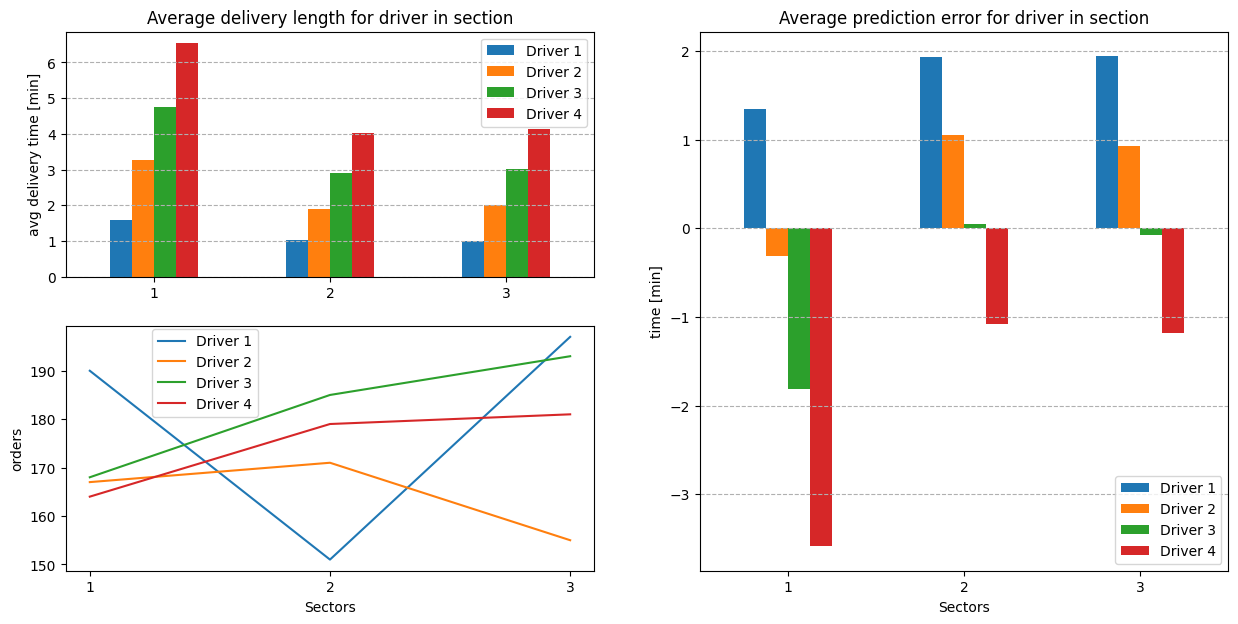

In [7]:

print(dt_set, aorders_set, order_weight_set)
sf_plot = pd.DataFrame(dt_set, index=sectors)
ao_plot = pd.DataFrame(aorders_set, index=sectors)
prdiff_plot = pd.DataFrame(dr_pred_diff, index=sectors)

fig, axes = plt.subplot_mosaic([["ul", "r"], ["ll", "r"]])
# plt.title("Avg delivery time for driver in sector")
fig.set_figheight(7)
fig.set_figwidth(15)

sf_plot.plot.bar(rot=0, ax=axes["ul"])
ao_plot.plot(ax=axes["ll"] )
prdiff_plot.plot.bar(rot=0, ax=axes["r"])

axes["ll"].set_xlabel("Sectors")
axes["ll"].set_ylabel("orders")
axes["ul"].set_ylabel("avg delivery time [min]")
axes["r"].set_xlabel("Sectors")
axes["r"].set_ylabel("time [min]")

axes["ll"].set_xticks(sectors)

axes["ul"].legend(bbox_to_anchor=(1, 1))
axes["ll"].legend(bbox_to_anchor=(.15, .6))

axes["ul"].grid(True, axis="y", linestyle="--")
axes["r"].grid(True, axis="y", linestyle="--")

axes["ul"].set_title("Average delivery length for driver in section")
axes["r"].set_title("Average prediction error for driver in section")

plt.savefig("./charts/driver_avg_data.png", dpi=150)

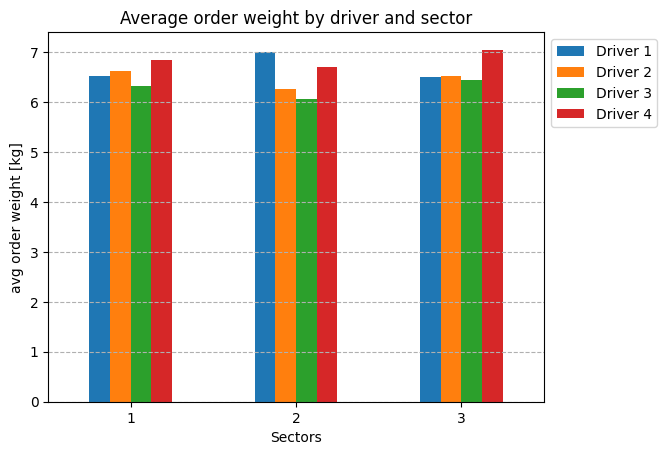

In [8]:
ow_plot = pd.DataFrame(order_weight_set, index=sectors)
ax = ow_plot.plot.bar()
plt.title("Average order weight by driver and sector")
ax.grid(True, axis="y", linestyle="--")
ax.set_ylabel("avg order weight [kg]")
ax.set_xlabel("sector")
ax.legend(bbox_to_anchor=(1, 1))

ax.set_xticks([0, 1, 2],sectors, rotation=0)
ax.set_xlabel("Sectors")

plt.savefig("./charts/avg_order_weight.png", dpi=150)

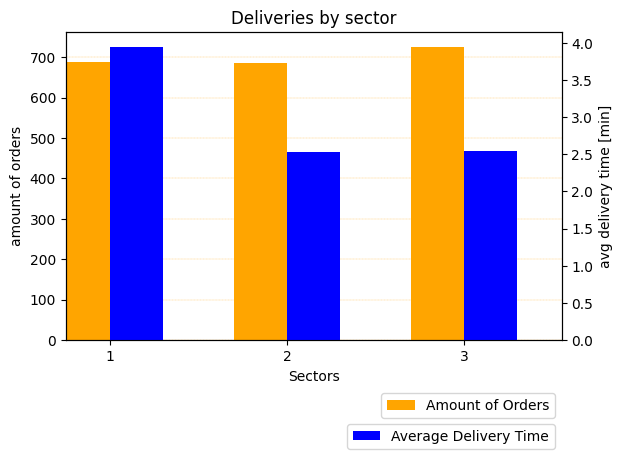

In [9]:
width = 0.3
fig, ax1 = plt.subplots()
fig.set_figheight(4)

plt.title("Deliveries by sector")
avg_deliveryTime = (avg_del_by_sector["avg_deliveryTime"] /60)

ax1.margins(0.05)
ax1.set_xlabel("Sectors")
ax1.set_ylabel("amount of orders")

ax2 = ax1.twinx()
ax2.set_ylabel("avg delivery time [min]")

avg_del_by_sector.amount_orders.plot(kind='bar', color='orange', ax=ax1, width=width, position=1, label="Amount of Orders", rot=90)
avg_deliveryTime.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label="Average Delivery Time", rot=90)

ax1.legend(bbox_to_anchor=(1, -.15))
ax2.legend(bbox_to_anchor=(1, -.25))

ax1.grid(True, axis="y", linestyle="--", lw=0.2, c="orange")
ax1.set_xticks([0, 1, 2],sectors, rotation=0)
ax1.set_xlabel("Sectors")

plt.savefig("./charts/deliveries_by_sector.png",dpi=150)


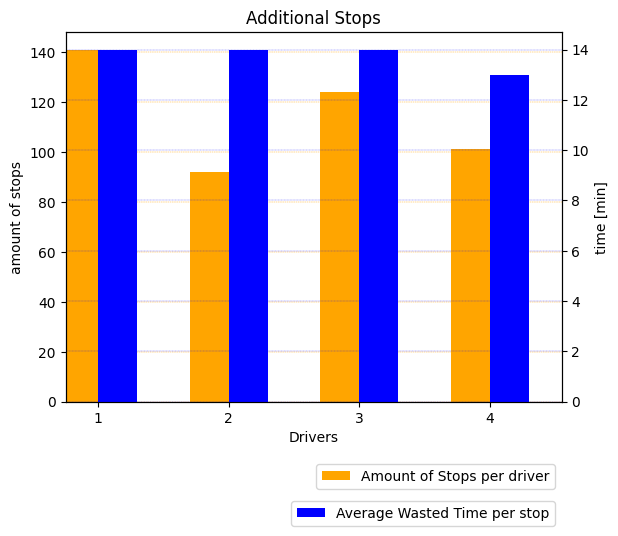

In [10]:
width = 0.3
fig, ax1 = plt.subplots()
plt.title("Additional Stops")
wastedTime = (wastedT_df["avg_WastedTimeByStop"] / 60).round()

ax1.margins(0.05)
ax1.set_xlabel("Sectors")
ax1.set_ylabel("amount of stops")

ax2 = ax1.twinx()
ax2.set_ylabel("time [min]")

wastedT_df.stops_count.plot(kind='bar', color='orange', ax=ax1, width=width, position=1, label="Amount of Stops per driver", rot=90)
wastedTime.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label="Average Wasted Time per stop", rot=90)

ax1.legend(bbox_to_anchor=(1, -.15))
ax2.legend(bbox_to_anchor=(1, -.25))
ax1.grid(True, axis="y", linestyle="--", lw=0.3, c="orange")
ax2.grid(True, axis="y", linestyle="--", lw=0.2, c="blue")

ax1.set_xticks([0, 1, 2, 3], drivers, rotation=0)
ax1.set_xlabel("Drivers")
plt.savefig("./charts/aditional stops.png", dpi=150)

In [11]:
# time_order = pd.read_csv("deliveryTime-per-order.csv")
time_order = pd.read_csv("./csv/deliveryTime-per-order_exclude_err.csv")
time_order

,order_id,seconds,planned_delivery_duration,time_diff
0,715,26,177,151
1,2096,26,177,151
2,1975,28,178,150
3,1026,29,176,147
4,288,29,176,147
...,...,...,...,...
2096,226,630,179,-451
2097,1783,662,178,-484
2098,1267,682,178,-504
2099,127,691,177,-514


In [12]:
# binwidth = 1

# fig, axes = plt.subplots(1, 2)
# fig.set_figwidth(10)

# axes[0].set_xlabel("Delivery time [min]")
# axes[1].set_xlabel("Delivery time [min]")

# times = (time_order["seconds"] / 60).round()
# labels = times.unique()
# # bins = max(labels) - min(labels)
# bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
# # print( labels, max(labels) - min(labels), max(labels), min(labels))

# axes[0].set_xlim(left=-1, right=13)
# values0, bins0, bars0 = axes[0].hist(times, bins=bins, width=0.9)

# axes[1].set_ylim(top=20)
# axes[1].set_xlim(left=240, right=250)
# axes[1].hist(times, bins=bins, width=0.9)

# axes[0].bar_label(bars0, fontsize=9)
# axes[1].bar_label(bars0, fontsize=9)

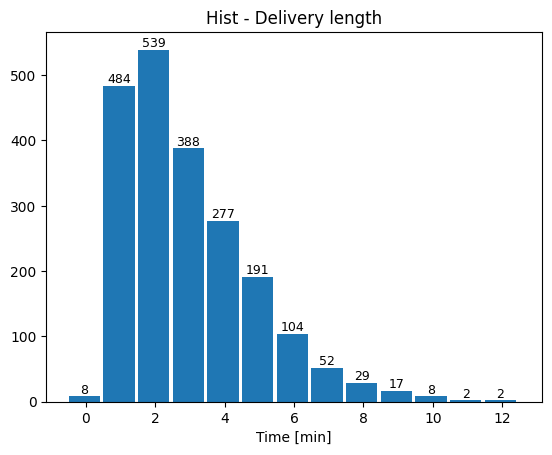

In [13]:
binwidth = 1

plt.title("Hist - Delivery length")
plt.xlabel("Time [min]")

times = (time_order["seconds"] / 60).round()
labels = times.unique()
# bins = max(labels) - min(labels)
bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
# print( labels, max(labels) - min(labels), max(labels), min(labels))

values0, bins0, bars0 = plt.hist(times, bins=bins, width=0.9)

plt.bar_label(bars0, fontsize=9)
plt.savefig("./charts/hist - delivery length.png", dpi=150)

In [14]:
# fig, axes = plt.subplots(1, 2)
# fig.set_figwidth(10)

# axes[0].set_xlabel("Prediction error [min]")
# axes[1].set_xlabel("Prediction error [min]")

# times = (time_order["seconds"] / 60).round()
# time_diff = (time_order["time_diff"] / 60).round()
# labels = time_diff.unique()
# # bins = max(labels) - min(labels)
# # bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
# bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
# print( labels, max(labels) - min(labels), max(labels), min(labels))

# axes[1].set_xlim(left=-10, right=4)
# # values0, bins0, bars0 = axes[0].hist(times, bins=bins, width=0.9)
# values0, bins0, bars0 = axes[1].hist(time_diff, bins=bins, width=0.9)

# axes[0].set_ylim(top=20)
# # axes[0].set_xlim(left=-247, right=-237)
# axes[0].hist(time_diff, bins=bins, width=0.9)

# axes[0].bar_label(bars0, fontsize=9)
# axes[1].bar_label(bars0, fontsize=9)

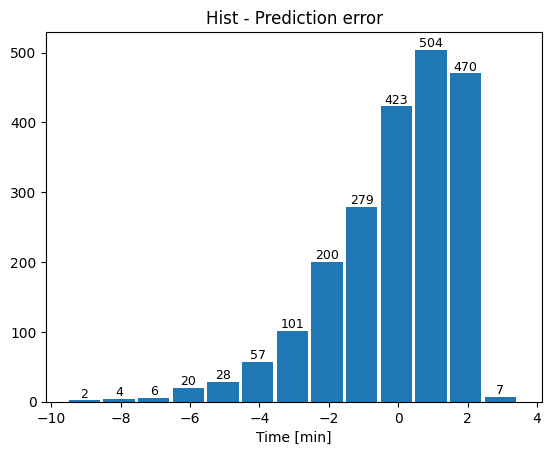

In [15]:
plt.xlabel("Time [min]")
plt.title("Hist - Prediction error")

# times = (time_order["seconds"] / 60).round()
time_diff = (time_order["time_diff"] / 60).round()
labels = time_diff.unique()
bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)

values0, bins0, bars0 = plt.hist(time_diff, bins=bins, width=0.9)

plt.bar_label(bars0, fontsize=9)
plt.savefig("./charts/hist - prediction error.png", dpi=150)

In [16]:
# driving = pd.read_csv("driving_time.csv")
driving = pd.read_csv("./csv/driving_time_exclude_err.csv")
driving

,seconds
0,120
1,121
2,121
3,121
4,121
...,...
2096,717
2097,717
2098,718
2099,718


In [17]:
# plt.xlabel("Time [min]")
# plt.title("Hist - Driving time")

# times = (driving["seconds"] / 60).round()
# labels = times.unique()
# bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
# print( labels, max(labels) - min(labels), max(labels), min(labels))

# values0, bins0, bars0 = plt.hist(times, bins=bins, width=0.9)
# plt.xlim(left=0, right=15)
# plt.bar_label(bars0, fontsize=9)
# plt.savefig("hist - prediction error.png", dpi=150)

[ 2  3  4  5  6  7  8  9 10 11 12] 10 12 2


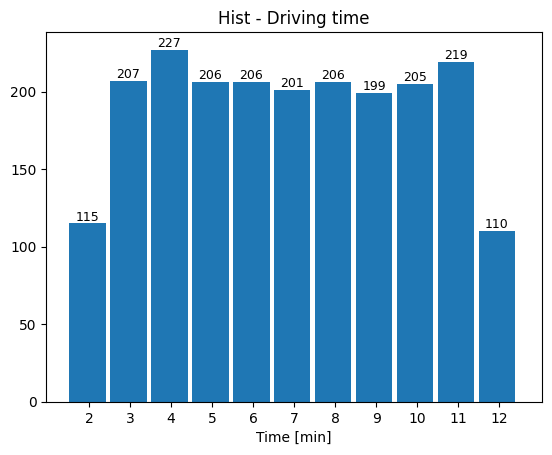

In [18]:
plt.xlabel("Time [min]")
plt.title("Hist - Driving time")

times = (driving["seconds"] / 60).round()
labels = times.unique().astype(int)
bins = np.arange(min(labels)-(binwidth/2), max(labels) + binwidth, binwidth)
print( labels, max(labels) - min(labels), max(labels), min(labels))

values0, bins0, bars0 = plt.hist(times, bins=bins, width=0.9)
plt.xticks(labels, labels)
plt.bar_label(bars0, fontsize=9)
plt.savefig("./charts/hist - driving time.png", dpi=150)

In [19]:
dr_driving = pd.read_csv("./csv/driving_time_by_driver.csv") #no error
dr_driving = dr_driving.set_index("driver_id")
dr_driving

,hours,avg_min_per_seg
driver_id,,
1,58.3333,6.4338
2,53.9833,6.4522
3,59.6500,6.6278
4,55.0333,6.4117


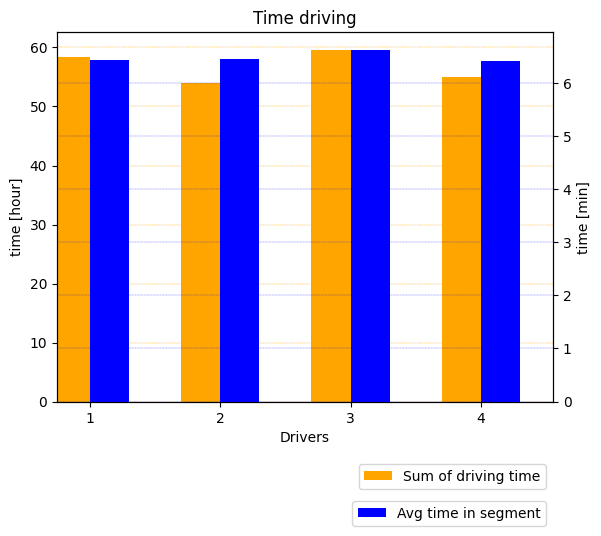

In [20]:
width = 0.3
fig, ax1 = plt.subplots()
plt.title("Time driving")

ax1.margins(0.05)
ax1.set_xlabel("Sectors")
ax1.set_ylabel("time [hour]")

ax2 = ax1.twinx()
ax2.set_ylabel("time [min]")

dr_driving.hours.plot(kind='bar', color='orange', ax=ax1, width=width, position=1, label="Sum of driving time", rot=90)
dr_driving.avg_min_per_seg.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label="Avg time in segment", rot=90)

ax1.legend(bbox_to_anchor=(1, -.15))
ax2.legend(bbox_to_anchor=(1, -.25))
ax1.grid(True, axis="y", linestyle="--", lw=0.3, c="orange")
ax2.grid(True, axis="y", linestyle="--", lw=0.2, c="blue")

ax1.set_xticks([0, 1, 2, 3], drivers, rotation=0)
ax1.set_xlabel("Drivers")

plt.savefig("./charts/time driving driver.png", dpi=150)